In [5]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
from fastai.vision.all import *
from fastbook import *

In [7]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


In [8]:
# This is the low level implementation of the fastai api, i.e pytorch at it's core

# We will perform the base oeration of ETL:
# Extract - get the fashion mnist data from source
# Transform - put our data in tensor form
# Load - put our data to an object to make it easily accessible 

# This will be done using the dataset and dataloader abstract classes directly from the torch library

In [9]:
train_set = torchvision.datasets.FashionMNIST(
    root='/home/slabban/machine_learning_courses/datasets'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
    
)

#'./data/FashionMNIST'

In [10]:
train_set?


Type:        FashionMNIST
String form:
Dataset FashionMNIST
           Number of datapoints: 60000
           Root location: /home/slabban/machine_lea <...>     Split: Train
           StandardTransform
           Transform: Compose(
           ToTensor()
           )
Length:      60000
File:        ~/anaconda3/envs/pytorch-fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py
Docstring:  
`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

Args:
    root (string): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
        and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
    train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
        otherwise from ``t10k-images-idx3-ubyte``.
    download (bool, optional): If True, downloads the dataset from the internet and
        puts it in root directory. If dataset is already downloaded, it is not
        downloaded again.
    transform (callable, 

In [11]:
# We set up the dataloader iterator
train_loader = torch.utils.data.DataLoader(train_set)

In [12]:
train_loader?

Type:        DataLoader
String form: <torch.utils.data.dataloader.DataLoader object at 0x7f7724635a60>
Length:      60000
File:        ~/anaconda3/envs/pytorch-fastai/lib/python3.9/site-packages/torch/utils/data/dataloader.py
Docstring:  
Data loader. Combines a dataset and a sampler, and provides an iterable over
the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples fro

In [13]:
# We set up the same Dataloader, but include the batch size
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [14]:
# We can have a look at our train set data
len(train_set)
train_set.train_labels

/home/slabban/anaconda3/envs/pytorch-fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [15]:
# Here we use the bincount method to validate that we have the same amount of data for each category
# It is very important that the numbers match!
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [16]:
# We can inspect an element of this train set using pythons built-in iter function 
sample = next(iter(train_set))

In [17]:
len(sample)

2

In [18]:
type(sample)

tuple

In [19]:
image, label = sample

In [20]:
type(image)

torch.Tensor

In [21]:
# We have respectively: Color Chanel, Height, Width
image.shape

torch.Size([1, 28, 28])

label = 9


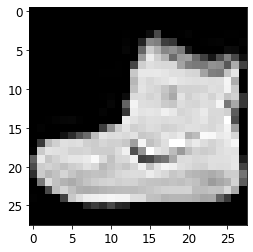

In [22]:
plt.imshow(image.squeeze(), cmap='gray')
print('label =', label)

In [23]:
# Similar to the train set, we may also iterate through the data loader
batch = next(iter(train_loader))

In [24]:
type(batch)

list

In [25]:
len(batch)

2

In [26]:
images, labels = batch

In [27]:
type(images)

torch.Tensor

In [28]:
# We can see that the images tensor is a batch of images of size 10 as we specified
images.shape

torch.Size([10, 1, 28, 28])

In [29]:
labels.shape

torch.Size([10])

In [30]:
grid = torchvision.utils.make_grid(images, nrow=10)

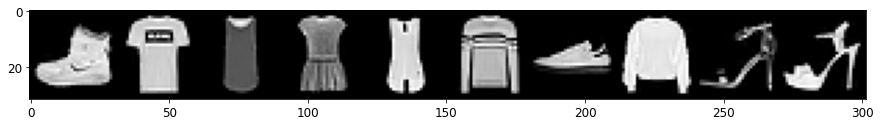

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [32]:
# Now that that ETL process is done, we can set up our model
# This is done using the base class called 'Module'. Module is the core class from which neural nets
# are built from

# The next building block is a method called forward pass, which is the transformation of our tensor as it passes
# through our layer or neural network
# Within the forward pass, we use methods from the torch's functional class to construct layers

In [33]:
# The nn.Module is the base class that we will use to build our neural networks
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        t = self.layer(t)
        return t

In [34]:
network = Network()

In [35]:
# We can very our nn structure using the 'print' operator
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)


In [36]:
# We can also view additonal information using the '?' operator provided in Notebooks
network??

Signature:       network(*input, **kwargs)
Type:            Network
String form:    
Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)
Docstring:       <no docstring>
Class docstring:
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            ret

In [37]:
# A quick python lesson, dunder functions (ex. __init__, __repr__) are functions that are written using the 'object'
# base class written in python. We simply override these functions when we inherit 'object'
# __repr__ in this case is meant to tell the user what the class represents, this is part of good 
# API writing practices
network.__repr__
object.__repr__

<slot wrapper '__repr__' of 'object' objects>

In [38]:
# Accessing the internals of the class using the dot operator

network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [39]:
# We see that the convolutional layer, while comprised of 6 ourput filters, is packaged into a single tensor 
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [40]:
# To access the individual filter

network.conv1.weight[0].shape

torch.Size([1, 5, 5])

In [41]:
# Conv2 will have 6 filters coming in from conv1

network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [42]:
# We can access the filters similarly

network.conv2.weight[0].shape

torch.Size([6, 5, 5])

In [43]:
# Looking at the fully connected layers, we see a rank 2 tensor that is known as a weight matrix
# Where the rows are layer output shape and the columns are the input shape
# This reflects how matrix multiplication works.. Internally the linear layer creates a weight matrix that 
# transforms the in_feature to the out_features
# This equation manifests in the form of y = Ax+b, where: 
# y = out_features, A = weight matrix, x = in_features, b = bias

network.fc1.weight.shape

torch.Size([120, 192])

In [44]:
network.fc2.weight.shape

torch.Size([60, 120])

In [45]:
# We can quickly access these weights using iteration

for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [46]:
# for a labelled view

for name, param in network.named_parameters():
    print(name, '\t\t',param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
fc3.weight 		 torch.Size([10, 60])
fc3.bias 		 torch.Size([10])


In [47]:
# Lets build on our Network class by implementing the 'forward' method, which accepts and returns a tensor
# We dont actually call this method ourselves as it is called via the __call__ function in our instantiated layers
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
       t = self.conv1(t)
       t = F.relu(t)
       t = F.max_pool2d(t, kernel_size =2, stride=2)

       t = self.conv2(t)
       t = F.relu(t)
       t = F.max_pool2d(t, kernel_size =2, stride=2)

       t = t.reshape(-1, 12*4*4)
       t = self.fc1(t)
       t = F.relu(t)

       t = self.fc2(t)
       t = F.relu(t)

       t = self.out(t)

       return t

In [48]:
# Lets use our forward method to get a prediction for iteration of our batch from above!

network  = Network()


In [49]:
preds = network(images)

In [50]:
preds

tensor([[-3.3426e-03, -7.1323e-02,  7.8255e-02, -8.3808e-02,  6.5652e-03, -5.0777e-02, -8.8978e-02, -5.0551e-02,  8.2188e-02, -1.0216e-01],
        [ 1.0021e-04, -7.1054e-02,  8.0478e-02, -8.3540e-02,  9.1273e-03, -5.0264e-02, -8.4848e-02, -5.0446e-02,  8.3748e-02, -1.0265e-01],
        [ 1.0123e-03, -6.7141e-02,  8.4918e-02, -8.7293e-02,  8.3175e-03, -5.6603e-02, -9.0827e-02, -4.6471e-02,  8.3293e-02, -9.6956e-02],
        [-5.7489e-04, -6.9723e-02,  8.0905e-02, -8.6568e-02,  9.3787e-03, -5.4597e-02, -8.9130e-02, -4.6755e-02,  8.2357e-02, -9.6836e-02],
        [-3.9236e-03, -7.1148e-02,  7.7897e-02, -8.1536e-02,  5.4800e-03, -5.2923e-02, -8.4848e-02, -5.0493e-02,  8.1978e-02, -1.0026e-01],
        [ 2.0220e-03, -7.1849e-02,  8.4364e-02, -8.4682e-02,  1.1787e-02, -5.2186e-02, -8.8768e-02, -4.9554e-02,  8.2816e-02, -1.0016e-01],
        [ 2.6240e-03, -6.6019e-02,  8.6990e-02, -8.8091e-02,  1.3576e-02, -4.7835e-02, -9.2482e-02, -4.5429e-02,  8.5548e-02, -9.6504e-02],
        [-2.7865e-03

In [51]:
# We can view these values as a probablility using the softmax function

F.softmax(preds, dim=1)

tensor([[0.1023, 0.0956, 0.1110, 0.0944, 0.1033, 0.0976, 0.0939, 0.0976, 0.1115, 0.0927],
        [0.1025, 0.0955, 0.1111, 0.0943, 0.1035, 0.0975, 0.0942, 0.0975, 0.1115, 0.0925],
        [0.1026, 0.0958, 0.1116, 0.0939, 0.1034, 0.0969, 0.0936, 0.0978, 0.1114, 0.0930],
        [0.1025, 0.0956, 0.1112, 0.0940, 0.1035, 0.0971, 0.0938, 0.0979, 0.1113, 0.0931],
        [0.1022, 0.0956, 0.1109, 0.0946, 0.1032, 0.0973, 0.0943, 0.0976, 0.1114, 0.0928],
        [0.1027, 0.0954, 0.1115, 0.0942, 0.1037, 0.0973, 0.0938, 0.0975, 0.1113, 0.0927],
        [0.1026, 0.0957, 0.1116, 0.0937, 0.1037, 0.0975, 0.0932, 0.0977, 0.1114, 0.0929],
        [0.1023, 0.0957, 0.1111, 0.0946, 0.1030, 0.0971, 0.0942, 0.0980, 0.1110, 0.0930],
        [0.1032, 0.0955, 0.1118, 0.0936, 0.1038, 0.0967, 0.0937, 0.0973, 0.1114, 0.0928],
        [0.1034, 0.0953, 0.1117, 0.0936, 0.1039, 0.0968, 0.0942, 0.0972, 0.1113, 0.0927]], grad_fn=<SoftmaxBackward0>)

In [52]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [53]:
# Comparing the preds to the argmax, which returns the index with the highest value, we can see that the batch predictions are clearly inaccurate
# which is what we would expect, interestingly, it predicts all objects to be the same, this is may be due to the batch havin similar images
preds.argmax(dim=1)

tensor([8, 8, 2, 8, 8, 2, 2, 2, 2, 2])

In [54]:
preds.shape

torch.Size([10, 10])

In [55]:
# Lets try another batch, we can see in the second iteration, we can see that the second batch has different predictions
sample = iter(train_loader)
iter1 = sample.next()
iter2 = sample.next()
images1, labels1 = iter2
preds = network(images1)
preds.argmax(dim=1)

tensor([8, 8, 2, 8, 2, 8, 8, 8, 2, 2])

In [56]:
# Since these weights are randomly initialized everytime we instantiate the class, we will most likely see different predictions if we instantiate
# the class again, just to keep in mind..

net1 = Network()
preds1 = net1(images)
preds1.argmax(dim=1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [57]:
# We can predict the predictions against the label using:

preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False, False, False])

In [58]:
# We can sum our correct predictions using 

preds.argmax(dim=1).eq(labels).sum()

tensor(0)

In [59]:
# Lets create a quick util function for this

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [60]:
# Lets get to training! I will recreate the dataloader, but will use a a batch size of 100 

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

In [61]:
# An important thing for multiple class predictions is the use a loss function called 'Cross-Entropy Loss'.
# Cross-Entropy loss comprises of two parts

# 1. Softmax. This is a extension of  sigmoid fucntion that allows us to get predictions for multiple 
# clasification i.e have an output layer that comprises of more than one neuron. 
# The basic Sigmoid falls short as taking the sum of the predictions for 2 or more classes will give us
# a value that is greater than one, which does not make any sense.
# The Softmax modification correts for this and sums the total predictions to one, as done above.
# An interesting observation about Softmax is that it exponentially increases the output.

# 2. Log Likelihood. In a nutshell, this uses indexing to enumerate individual classes with their 
# own unique value, this enables us to assign predictions to multiple classes, and hence, have their own
# prediction

# Interstingly enough, we don't actually take the natural log, it is found to be much more efficient and accurate 
# to take the nautal log during the Softmax portion. The reason we take the log is to give our model the ability
# To further train our model beyond the restriction of 0 to 1, from -infinity to 0 (ln(0) - ln(1))

In [62]:
# Calculating the loss:

preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3157265186309814

In [63]:
# When looking at the weights in the conv kernels, you can see at the end that there is a parameter called 'required_grad'
# That tracks the operations done on the weight and is the key behind backpropagation
print(network.conv2.weight)

Parameter containing:
tensor([[[[-2.8316e-02, -4.8351e-02, -3.7559e-02,  6.8216e-02,  5.5711e-02],
          [-3.6886e-02,  8.0723e-02,  3.0644e-02,  2.6414e-02, -6.2474e-02],
          [-2.0288e-02,  7.2119e-02,  5.3936e-02,  4.2113e-02, -3.9325e-02],
          [-2.0261e-02,  3.3725e-02,  2.7609e-02, -2.5013e-02, -4.1496e-02],
          [-6.5895e-02, -6.5045e-02, -3.3760e-02,  4.3067e-02, -3.9707e-02]],

         [[ 2.6576e-02, -5.7274e-02, -2.5711e-03, -4.8753e-02, -3.7714e-02],
          [ 4.9149e-02,  2.1616e-02,  7.2044e-02,  2.0826e-02,  2.0473e-03],
          [ 6.6232e-02, -5.7235e-02,  4.7176e-02, -2.2034e-04, -2.3772e-03],
          [-5.0638e-02, -3.6921e-04, -5.2505e-02,  4.7058e-02, -5.4225e-02],
          [-8.3587e-03,  7.7379e-02, -6.9040e-03, -6.5488e-02,  2.0533e-02]],

         [[ 2.1017e-02, -4.0556e-02, -6.9674e-02, -8.1555e-02, -4.4096e-02],
          [ 2.1344e-03, -7.3207e-02, -6.8388e-02,  2.5125e-02, -6.5908e-02],
          [ 5.1277e-04,  2.2318e-02,  7.2474e-02, 

In [64]:
# We can inspect access the current gradient of those weight, which should not exist since we havent
# actually backpropagated the loss
print(network.conv2.weight.grad)

None


In [65]:
# Calculating the gradients
loss.backward()

In [66]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [67]:
# Now that we have our gradients, we can an optimizer such as SGD or ADAM to update the weights and assign a learning rate 'lr'
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [68]:
loss.item()

2.3157265186309814

In [69]:
# Let do a quick check for the orrect predicitons using our new function
get_num_correct(preds, labels)

13

In [70]:
# This is the magical weight updating step for backpropagation
optimizer.step()

In [71]:
# New lets pass the batch in again an see if we had some imporvement
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [72]:
# The loss has decreased
loss.item()

2.2907307147979736

In [73]:
# Our correct predictions have gone from 4 to 14
get_num_correct(preds, labels)

20

In [74]:
# Lets group the steps needed to run one batch through our network 

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

# Print the loss decrease after 1 epoch
print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3020825386047363
loss2: 2.2572433948516846


In [75]:
# Using our dataloader iterator, we can loop through all the batches using the same block run above
# The complete run of all batches is called an epoch

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0 
total_correct = 0

for batch in train_loader:
  images, labels = batch

  preds = network(images)
  loss = F.cross_entropy(preds, labels)

  # In the iterative case, we zero out the gradients as they are accumulated by default
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  total_loss += loss.item()
  total_correct += get_num_correct(preds, labels)

print("epoch:", 0, "total_correct", total_correct, "loss:", total_loss)

epoch: 0 total_correct 46699 loss: 347.7001882195473


In [76]:
# We can gauge out accuracy using our total correct values

model_accuracy = total_correct/len(train_set)
print(model_accuracy)

0.7783166666666667


In [77]:
# Building further on the block, we introduce multiple epochs 

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):

  total_loss = 0 
  total_correct = 0

  for batch in train_loader:
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds, labels)

    # In the iterative case, we zero out the gradients as they are accumulated by default
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

  print("epoch:", epoch, "total_correct", total_correct, "loss:", total_loss)

epoch: 0 total_correct 46517 loss: 355.62950149178505
epoch: 1 total_correct 51135 loss: 237.77352294325829
epoch: 2 total_correct 51871 loss: 218.17713123559952
epoch: 3 total_correct 52193 loss: 211.47740796208382
epoch: 4 total_correct 52447 loss: 200.6079763174057


In [78]:
# Lets gauge our accuracy again

model_accuracy = total_correct/len(train_set)
print(model_accuracy)

0.8741166666666667


In [79]:
# Analyzing CNN Results via building a confusion matrix

len(train_set)

60000

In [80]:
# The targets correspond to the labels, which should match the train set
len(train_set.targets)

60000

In [81]:
# We will need to get the predictions from the model, which we would prefer to get
# via our dataloader, since it is better than feeding the entire set in one run (Unless you have a monster machine)

def get_all_preds(model, loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch
    preds = model(images)
    all_preds = torch.cat((all_preds, preds), dim=0)
  return all_preds


In [82]:
# Getting a little insight into the 'cat' method, we can confirm that the predictions 
# is in the form of a rank 2 tensor, where the first axis are the images and the 
# second axis are our classes, concatenating by the first dimension, the output
# of this function should be (60000, 10)

preds = network(images)
preds.shape

torch.Size([100, 10])

In [83]:
# Lets create a larger batch size for these predictions and run the our function
# As a good practice, its computationally better to run these operations with the 
# gradient disabled: 

with torch.no_grad():
  prediction_loader = torch.utils.data.DataLoader(train_set, batch_size= 10000)
  train_preds = get_all_preds(network, prediction_loader)


In [84]:
# We confirm the output of our function

train_preds.shape

torch.Size([60000, 10])

In [85]:
# Now to build our confusion matrix
# First we need to align our original targets(labels) with our predicitons

train_set.targets
train_preds.argmax(dim=1)

stacked = torch.stack((train_set.targets, train_preds.argmax(dim=1)), dim=1)

In [86]:
stacked.shape

torch.Size([60000, 2])

In [87]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [88]:
# Lets now create a tensor to represent the confusion matrix
cMat = torch.zeros(10,10, dtype=torch.int32)
cMat

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [89]:
# going through our stacked values, we can increment the respective correct slot 
for p in stacked:
  tl,pl = p.tolist()
  cMat[tl,pl] = cMat[tl,pl]+1

In [90]:
cMat

tensor([[5427,    6,  103,   91,   25,    3,  289,    0,   56,    0],
        [  11, 5828,    3,  120,   11,    2,   20,    0,    5,    0],
        [  47,    8, 4412,   84,  884,    2,  496,    0,   67,    0],
        [ 295,   17,   26, 5338,  245,    0,   67,    0,   12,    0],
        [   8,    4,  232,  214, 5119,    1,  342,    0,   80,    0],
        [   0,    1,    0,    0,    0, 5805,    0,  156,    6,   32],
        [1318,    6,  409,  125,  640,    1, 3411,    0,   90,    0],
        [   0,    0,    0,    0,    0,   53,    0, 5844,    6,   97],
        [  11,    4,    7,   21,   23,   14,   42,    5, 5872,    1],
        [   0,    0,    1,    1,    0,   39,    0,  231,    6, 5722]], dtype=torch.int32)

In [91]:
# To make things easier down the line, we can use libraries to plot these matrices 

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_confusion_matrix




In [92]:
conf_mat = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(conf_mat))

<class 'numpy.ndarray'>


In [93]:
# Using Chris' function for plotting the confusion matrix
# source: https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
tensor([[5427,    6,  103,   91,   25,    3,  289,    0,   56,    0],
        [  11, 5828,    3,  120,   11,    2,   20,    0,    5,    0],
        [  47,    8, 4412,   84,  884,    2,  496,    0,   67,    0],
        [ 295,   17,   26, 5338,  245,    0,   67,    0,   12,    0],
        [   8,    4,  232,  214, 5119,    1,  342,    0,   80,    0],
        [   0,    1,    0,    0,    0, 5805,    0,  156,    6,   32],
        [1318,    6,  409,  125,  640,    1, 3411,    0,   90,    0],
        [   0,    0,    0,    0,    0,   53,    0, 5844,    6,   97],
        [  11,    4,    7,   21,   23,   14,   42,    5, 5872,    1],
        [   0,    0,    1,    1,    0,   39,    0,  231,    6, 5722]], dtype=torch.int32)


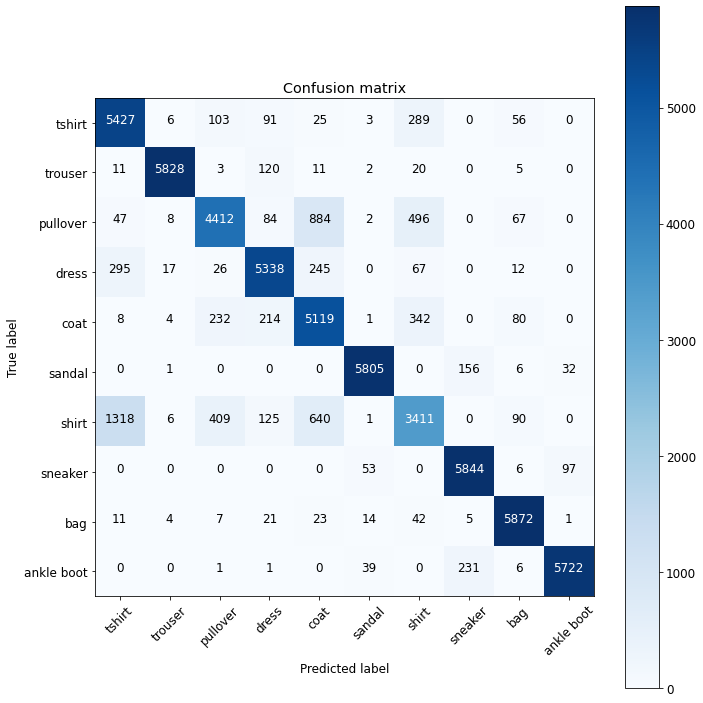

In [94]:

names = ('tshirt', 'trouser','pullover', 'dress', 'coat','sandal','shirt','sneaker','bag','ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cMat, names)

Some extra utilities to make life easier and more efficient:

TensorBoard: a front-end web interface that essentially reads data from a file and displays it. To use TensorBoard our task is to get the data we want displayed saved to a file that TensorBoard can read. We will use this to better evaluate different network training runs. fyi, I will be using the vscode plugin for tensorboard to get this going.

tqdm: Progress bars!

In [95]:
# Import tensorboard 
from torch.utils.tensorboard import SummaryWriter

# Import tqdm
from tqdm import tqdm

In [96]:
# Lets start out with TensorBoard Graph & Images. 
# We will create a SummaryWriter Object and the the network instance
# and extract the images and labels using the usual technique

tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
# We add the built make_grid method to vizualize out batch
grid = torchvision.utils.make_grid(images)

# We can add the grid and graph that shows the construction of our neural network
tb.add_image('images', grid)
tb.add_graph(network, images)

tb.close()

In [97]:
# Lets now use tensorboard this in our training loop

network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

# We instantiate our Summary writer, adding images and the network arch as done in the block above
tb = SummaryWriter()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)
tb.add_image('images', grid)
tb.add_graph(network, images)


for epoch in range(10):

  total_loss = 0
  total_correct = 0

  # We wrap our train_loader data loader as a tqdm instance 'tepoch', allowing us to integrate the vizulizer
  # as we iterate through the batches
  with tqdm(train_loader, unit="batch") as tepoch:

    for batch in tepoch:
      # We set our decrption per epoch
      tepoch.set_description(f"Epoch {epoch}")

      images, labels = batch

      preds = network(images)
      loss = F.cross_entropy(preds, labels)

      # In the iterative case, we zero out the gradients as they are accumulated by default
      optimizer.zero_grad()
      loss.backward() # calculate gradients
      optimizer.step() # update weights

      total_loss += loss.item()
      total_correct += get_num_correct(preds, labels)

      # This method allows us to append extra , metrics to the progress bar
      tepoch.set_postfix(total_loss = total_loss, total_correct = total_correct)

  # We use the 'add_scalar' method to iteratively group the total loss, Correct Predections, and Accuracy per epoch
  tb.add_scalar('Loss', total_loss, epoch)
  tb.add_scalar('Number Correct', total_correct, epoch)
  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)

  # We use the 'add_histogram' function to pass in groups of data t
  tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
  tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
  tb.add_histogram('conv1.weight.grad', network.conv1.weight.grad, epoch)

tb.close()


Epoch 9: 100%|██████████| 600/600 [00:04<00:00, 129.63batch/s, total_correct=53126, total_loss=184] 


Lets now leverage the power of tensor board in order to train our data for multiple iterations to experiment with different hyperparameters.

A brute force solution that comes to mind is to iterate through nested 'for' loops of list of each parameter, but lets shoot for elegance

In [98]:
# If we have a list of parameters, we can package them up into a 
# set for each of our runs using the Cartesian product. For this we'll use the product function from the itertools library. 

from itertools import product

In [99]:
# Next we create key-value pairs for three parameters that we will be using
# learning rate, batch size, and shuffle
# shuffle is a new parameter we will be introducing, it shuffle the data every epoch 

parameters = dict(
    lr = [.01, .001, 0.001]
    ,batch_size = [100, 1000, 10000]
    ,shuffle = [True, False]
)

In [100]:
# We now convert the dictionary to a list of iterables that we can pass to the product functions using list comprehension

param_values = [v for v in parameters.values()]
param_values

[[0.01, 0.001, 0.001], [100, 1000, 10000], [True, False]]

In [101]:
# using the product function, we can now get a unique combination of our parameters

for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)


0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.01 10000 True
0.01 10000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False
0.001 10000 True
0.001 10000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False
0.001 10000 True
0.001 10000 False


In [102]:
network = Network()

parameter_count = 0

total_parameter_count = len(list(product(*param_values))) 

# We now pass in our parameters in one clean line
for lr, batch_size, shuffle in product(*param_values): 

  parameter_count += 1  
  print("training parameter set number:", parameter_count, "out of", total_parameter_count)

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=shuffle)
  optimizer = optim.Adam(network.parameters(), lr=lr)

  # This time, we add a string as a comment to the summary writer, allowing us to ID the parameters we used in that specific run
  comment = f' batch_size={batch_size} lr={lr} shuffle={shuffle}'
  tb = SummaryWriter(comment=comment)
  images, labels = next(iter(train_loader))
  grid = torchvision.utils.make_grid(images)
  tb.add_image('images', grid)
  tb.add_graph(network, images)


  for epoch in range(3):
    total_loss = 0
    total_correct = 0
    with tqdm(train_loader, unit="batch") as tepoch:

      for batch in tepoch:
        # We set our decrption per epoch
        tepoch.set_description(f"Epoch {epoch}")

        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward() # calculate gradients
        optimizer.step() # update weights

        # Since we will be varying our batch sizes, we will need to multiply by batch sizes to make the losses 
        # comparable between runs
        total_loss += loss.item() * images.shape[0]
        total_correct += get_num_correct(preds, labels)

        # This method allows us to append extra , metrics to the progress bar
        tepoch.set_postfix(total_loss = total_loss, total_correct = total_correct)

    # We use the 'add_scalar' method to iteratively group the total loss, Correct Predections, and Accuracy per epoch
    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)

    # Generalzing, now we can observe the weights across all layers of the network
    for name, weight in network.named_parameters():
      tb.add_histogram(name, weight, epoch)
      tb.add_histogram(f'{name}.grad', weight.grad, epoch)

tb.close()


training parameter set number: 1 out of 18


Epoch 2: 100%|██████████| 600/600 [00:05<00:00, 108.59batch/s, total_correct=52023, total_loss=2.14e+4]


training parameter set number: 2 out of 18


Epoch 2: 100%|██████████| 600/600 [00:03<00:00, 150.36batch/s, total_correct=52710, total_loss=1.97e+4]


training parameter set number: 3 out of 18


Epoch 2: 100%|██████████| 60/60 [00:02<00:00, 21.15batch/s, total_correct=54479, total_loss=1.46e+4]


training parameter set number: 4 out of 18


Epoch 2: 100%|██████████| 60/60 [00:03<00:00, 15.76batch/s, total_correct=54830, total_loss=1.36e+4]


training parameter set number: 5 out of 18


Epoch 2: 100%|██████████| 6/6 [00:03<00:00,  1.96batch/s, total_correct=55275, total_loss=1.24e+4]


training parameter set number: 6 out of 18


Epoch 2: 100%|██████████| 6/6 [00:03<00:00,  1.92batch/s, total_correct=55426, total_loss=1.19e+4]


training parameter set number: 7 out of 18


Epoch 2: 100%|██████████| 600/600 [00:05<00:00, 106.92batch/s, total_correct=55676, total_loss=1.13e+4]


training parameter set number: 8 out of 18


Epoch 2: 100%|██████████| 600/600 [00:07<00:00, 78.02batch/s, total_correct=55931, total_loss=1.06e+4] 


training parameter set number: 9 out of 18


Epoch 2: 100%|██████████| 60/60 [00:06<00:00,  9.33batch/s, total_correct=56238, total_loss=9.87e+3]


training parameter set number: 10 out of 18


Epoch 2: 100%|██████████| 60/60 [00:06<00:00,  9.34batch/s, total_correct=56285, total_loss=9.71e+3]


training parameter set number: 11 out of 18


Epoch 2: 100%|██████████| 6/6 [00:09<00:00,  1.55s/batch, total_correct=56435, total_loss=9.39e+3]


training parameter set number: 12 out of 18


Epoch 2: 100%|██████████| 6/6 [00:08<00:00,  1.44s/batch, total_correct=56462, total_loss=9.33e+3]


training parameter set number: 13 out of 18


Epoch 2: 100%|██████████| 600/600 [00:10<00:00, 58.66batch/s, total_correct=56170, total_loss=9.94e+3]


training parameter set number: 14 out of 18


Epoch 2: 100%|██████████| 600/600 [00:11<00:00, 53.48batch/s, total_correct=56341, total_loss=9.45e+3]


training parameter set number: 15 out of 18


Epoch 2: 100%|██████████| 60/60 [00:06<00:00,  9.46batch/s, total_correct=56645, total_loss=8.74e+3]


training parameter set number: 16 out of 18


Epoch 2: 100%|██████████| 60/60 [00:07<00:00,  7.95batch/s, total_correct=56697, total_loss=8.62e+3]


training parameter set number: 17 out of 18


Epoch 2: 100%|██████████| 6/6 [00:06<00:00,  1.00s/batch, total_correct=56816, total_loss=8.3e+3] 


training parameter set number: 18 out of 18


Epoch 2: 100%|██████████| 6/6 [00:09<00:00,  1.50s/batch, total_correct=56852, total_loss=8.24e+3]


Lets clean up our hyperparameter tuning even further through building a runbuilder class to automate the processes done above

In [103]:
# We create a class called RunBuilder with a static function which we can pass in the same type of dictionary that we had used before

class RunBuilder():
    @staticmethod
    def get_runs(params):
        # 
        Run = namedtuple('Run', params.keys())

        runs = []
        for vals in product(*params.values()):
            runs.append(Run(*vals))
        return runs

In [104]:
# Using our paramters from before, we demonstrate how to use this class to generate our list of parameters
parameters = dict(
    lr = [.01, .001, 0.001]
    ,batch_size = [100, 1000, 10000]
    ,shuffle = [True, False]
)

# Because this was created as a static method, we dont have to instantiate the class to use that method
# It is effectively a utility function of that class
runs = RunBuilder.get_runs(parameters)

runs

[Run(lr=0.01, batch_size=100, shuffle=True),
 Run(lr=0.01, batch_size=100, shuffle=False),
 Run(lr=0.01, batch_size=1000, shuffle=True),
 Run(lr=0.01, batch_size=1000, shuffle=False),
 Run(lr=0.01, batch_size=10000, shuffle=True),
 Run(lr=0.01, batch_size=10000, shuffle=False),
 Run(lr=0.001, batch_size=100, shuffle=True),
 Run(lr=0.001, batch_size=100, shuffle=False),
 Run(lr=0.001, batch_size=1000, shuffle=True),
 Run(lr=0.001, batch_size=1000, shuffle=False),
 Run(lr=0.001, batch_size=10000, shuffle=True),
 Run(lr=0.001, batch_size=10000, shuffle=False),
 Run(lr=0.001, batch_size=100, shuffle=True),
 Run(lr=0.001, batch_size=100, shuffle=False),
 Run(lr=0.001, batch_size=1000, shuffle=True),
 Run(lr=0.001, batch_size=1000, shuffle=False),
 Run(lr=0.001, batch_size=10000, shuffle=True),
 Run(lr=0.001, batch_size=10000, shuffle=False)]

In [105]:
# We can now iterate over our network with these parameters in one clean statement

for run in runs:
    print(run.lr, run.batch_size, run.shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.01 10000 True
0.01 10000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False
0.001 10000 True
0.001 10000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False
0.001 10000 True
0.001 10000 False


We will now take a shot at cleaning up pur program even further by taking advantage of our OOP priviledge in python.

With that, we are going to build a RunManager class..

In [106]:
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from collections import namedtuple
from collections import OrderedDict

In [121]:
# Here is Depplizard's Vanilla implementation of the RunManager class

class RunManager():
    def __init__(self):
        # TODO: extract epoch && run variables into individual classes
        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None

        self.tqdm_epoch = None
    
    def begin_run(self, run, network, loader):
        self.run_start_time = time.time()
        self.run_params = run
        self.run_count += 1

        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f'-{run}')

        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)

        self.tb.add_image('images', grid)
        self.tb.add_graph(self.network, images)


    
    def end_run(self):
        self.tb.close()
        self.epoch_count = 0
    
    def begin_epoch(self):
        self.epoch_start_time = time.time()
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.tqdm_epoch = tqdm(self.loader, unit="batch")
        
    
    def end_epoch(self):
        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss /len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        
        self.tb.add_scalar('Loss', loss, self.epoch_count)
        self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

        for name, param in self.network.named_parameters():
            self.tb.add_histogram(name, param, self.epoch_count)
            self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
        

        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results['loss'] = loss
        results["accuracy"] = accuracy
        results['epoch duration'] = epoch_duration
        results['run duration'] = run_duration
        for key,val in self.run_params._asdict().items(): results[key] = val
        self.run_data.append(results)

        df = pd.DataFrame.from_dict(self.run_data, orient='columns')

        clear_output(wait=True)
        display(df)
        
    def track_loss(self, loss, batch):
        self.epoch_loss += loss.item() * batch[0].shape[0]
    
    @torch.no_grad()
    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)
    

    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()
    
    def save(self, fileName):
        pd.DataFrame.from_dict(
            self.run_data, orient='columns'
        ).to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)
    
        

In [127]:
# Here is the updated implementation of the new training loop

parameters = dict(
    lr = [.001, 0.001]
    ,batch_size = [1000, 10000]
    ,shuffle = [True, False]
    , epochs = [3]
)

manager = RunManager()
for run in RunBuilder.get_runs(parameters):

    network = Network()
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=run.batch_size, shuffle=run.shuffle)
    optimizer = optim.Adam(network.parameters(), lr=run.lr)

    total_epochs = range(run.epochs)

    manager.begin_run(run, network, train_loader)
    for epoch in total_epochs:
        manager.begin_epoch()
        
        for batch in manager.tqdm_epoch:

            manager.tqdm_epoch.set_description(f"Epoch {manager.epoch_count} of {run.epochs}")
            
            images = batch[0]
            labels = batch[1]

            preds = network(images)
            loss = F.cross_entropy(preds, labels)
            optimizer.zero_grad()
            loss.backward() # calculate gradients
            optimizer.step() # update weights

            manager.track_loss(loss, batch)
            manager.track_num_correct(preds, labels)
        manager.end_epoch()
    manager.end_run()

# Commenting out to prevent file overcrowding
#manager.save('results')
        

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle,epochs
0,1,1,1.509927,0.464950,2.711036,2.944438,0.001,1000,True,3
1,1,2,0.789484,0.700783,3.939672,6.909677,0.001,1000,True,3
2,1,3,0.682703,0.739317,2.593451,9.540927,0.001,1000,True,3
3,2,1,1.511510,0.489250,3.316304,3.546026,0.001,1000,False,3
4,2,2,0.766451,0.706150,3.095855,6.678204,0.001,1000,False,3
5,2,3,0.668249,0.738283,3.539930,10.244856,0.001,1000,False,3
6,3,1,2.298662,0.141083,5.698325,8.588367,0.001,10000,True,3
7,3,2,2.264268,0.278850,5.209813,13.832482,0.001,10000,True,3
8,3,3,2.166583,0.289733,2.959780,16.818229,0.001,10000,True,3
9,4,1,2.300042,0.100000,3.480291,5.716273,0.001,10000,False,3
